<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

---

<h1>Lab Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-the-data" data-toc-modified-id="Import-the-data-1">Import the data</a></span></li><li><span><a href="#Do-some-EDA-of-relationships-between-features" data-toc-modified-id="Do-some-EDA-of-relationships-between-features-2">Do some EDA of relationships between features</a></span></li><li><span><a href="#Prepare-the-data-for-clustering" data-toc-modified-id="Prepare-the-data-for-clustering-3">Prepare the data for clustering</a></span></li><li><span><a href="#Rescale-the-data-if-necessary" data-toc-modified-id="Rescale-the-data-if-necessary-4">Rescale the data if necessary</a></span></li><li><span><a href="#Clustering-with-K-Means" data-toc-modified-id="Clustering-with-K-Means-5">Clustering with K-Means</a></span></li><li><span><a href="#Get-the-labels-and-centroids-for-out-first-clustering-model" data-toc-modified-id="Get-the-labels-and-centroids-for-out-first-clustering-model-6">Get the labels and centroids for out first clustering model</a></span></li><li><span><a href="#Compute-the-silhouette-score-and-visually-examine-the-results-of-the-clusters" data-toc-modified-id="Compute-the-silhouette-score-and-visually-examine-the-results-of-the-clusters-7">Compute the silhouette score and visually examine the results of the clusters</a></span></li><li><span><a href="#Repeat-the-last-steps-with-two-selected-K-values-and-compare-the-results" data-toc-modified-id="Repeat-the-last-steps-with-two-selected-K-values-and-compare-the-results-8">Repeat the last steps with two selected K values and compare the results</a></span></li><li><span><a href="#Build-a-function-to-find-the-optimal-number-of-clusters-using-silhouette-score-as-the-criterion." data-toc-modified-id="Build-a-function-to-find-the-optimal-number-of-clusters-using-silhouette-score-as-the-criterion.-9">Build a function to find the optimal number of clusters using silhouette score as the criterion.</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn import cluster

### Import the data

In [3]:
seeds = pd.read_csv("../../../../../resource-datasets/seeds/seeds.csv")

In [4]:
# Taking a peek
seeds.head()

area  perimeter  compactness  length  width  asymmetry_coeff  \
0  15.26      14.84       0.8710   5.763  3.312            2.221   
1  14.88      14.57       0.8811   5.554  3.333            1.018   
2  14.29      14.09       0.9050   5.291  3.337            2.699   
3  13.84      13.94       0.8955   5.324  3.379            2.259   
4  16.14      14.99       0.9034   5.658  3.562            1.355   

   groove_length  species  
0          5.220        1  
1          4.956        1  
2          4.825        1  
3          4.805        1  
4          5.175        1

### Do some EDA of relationships between features

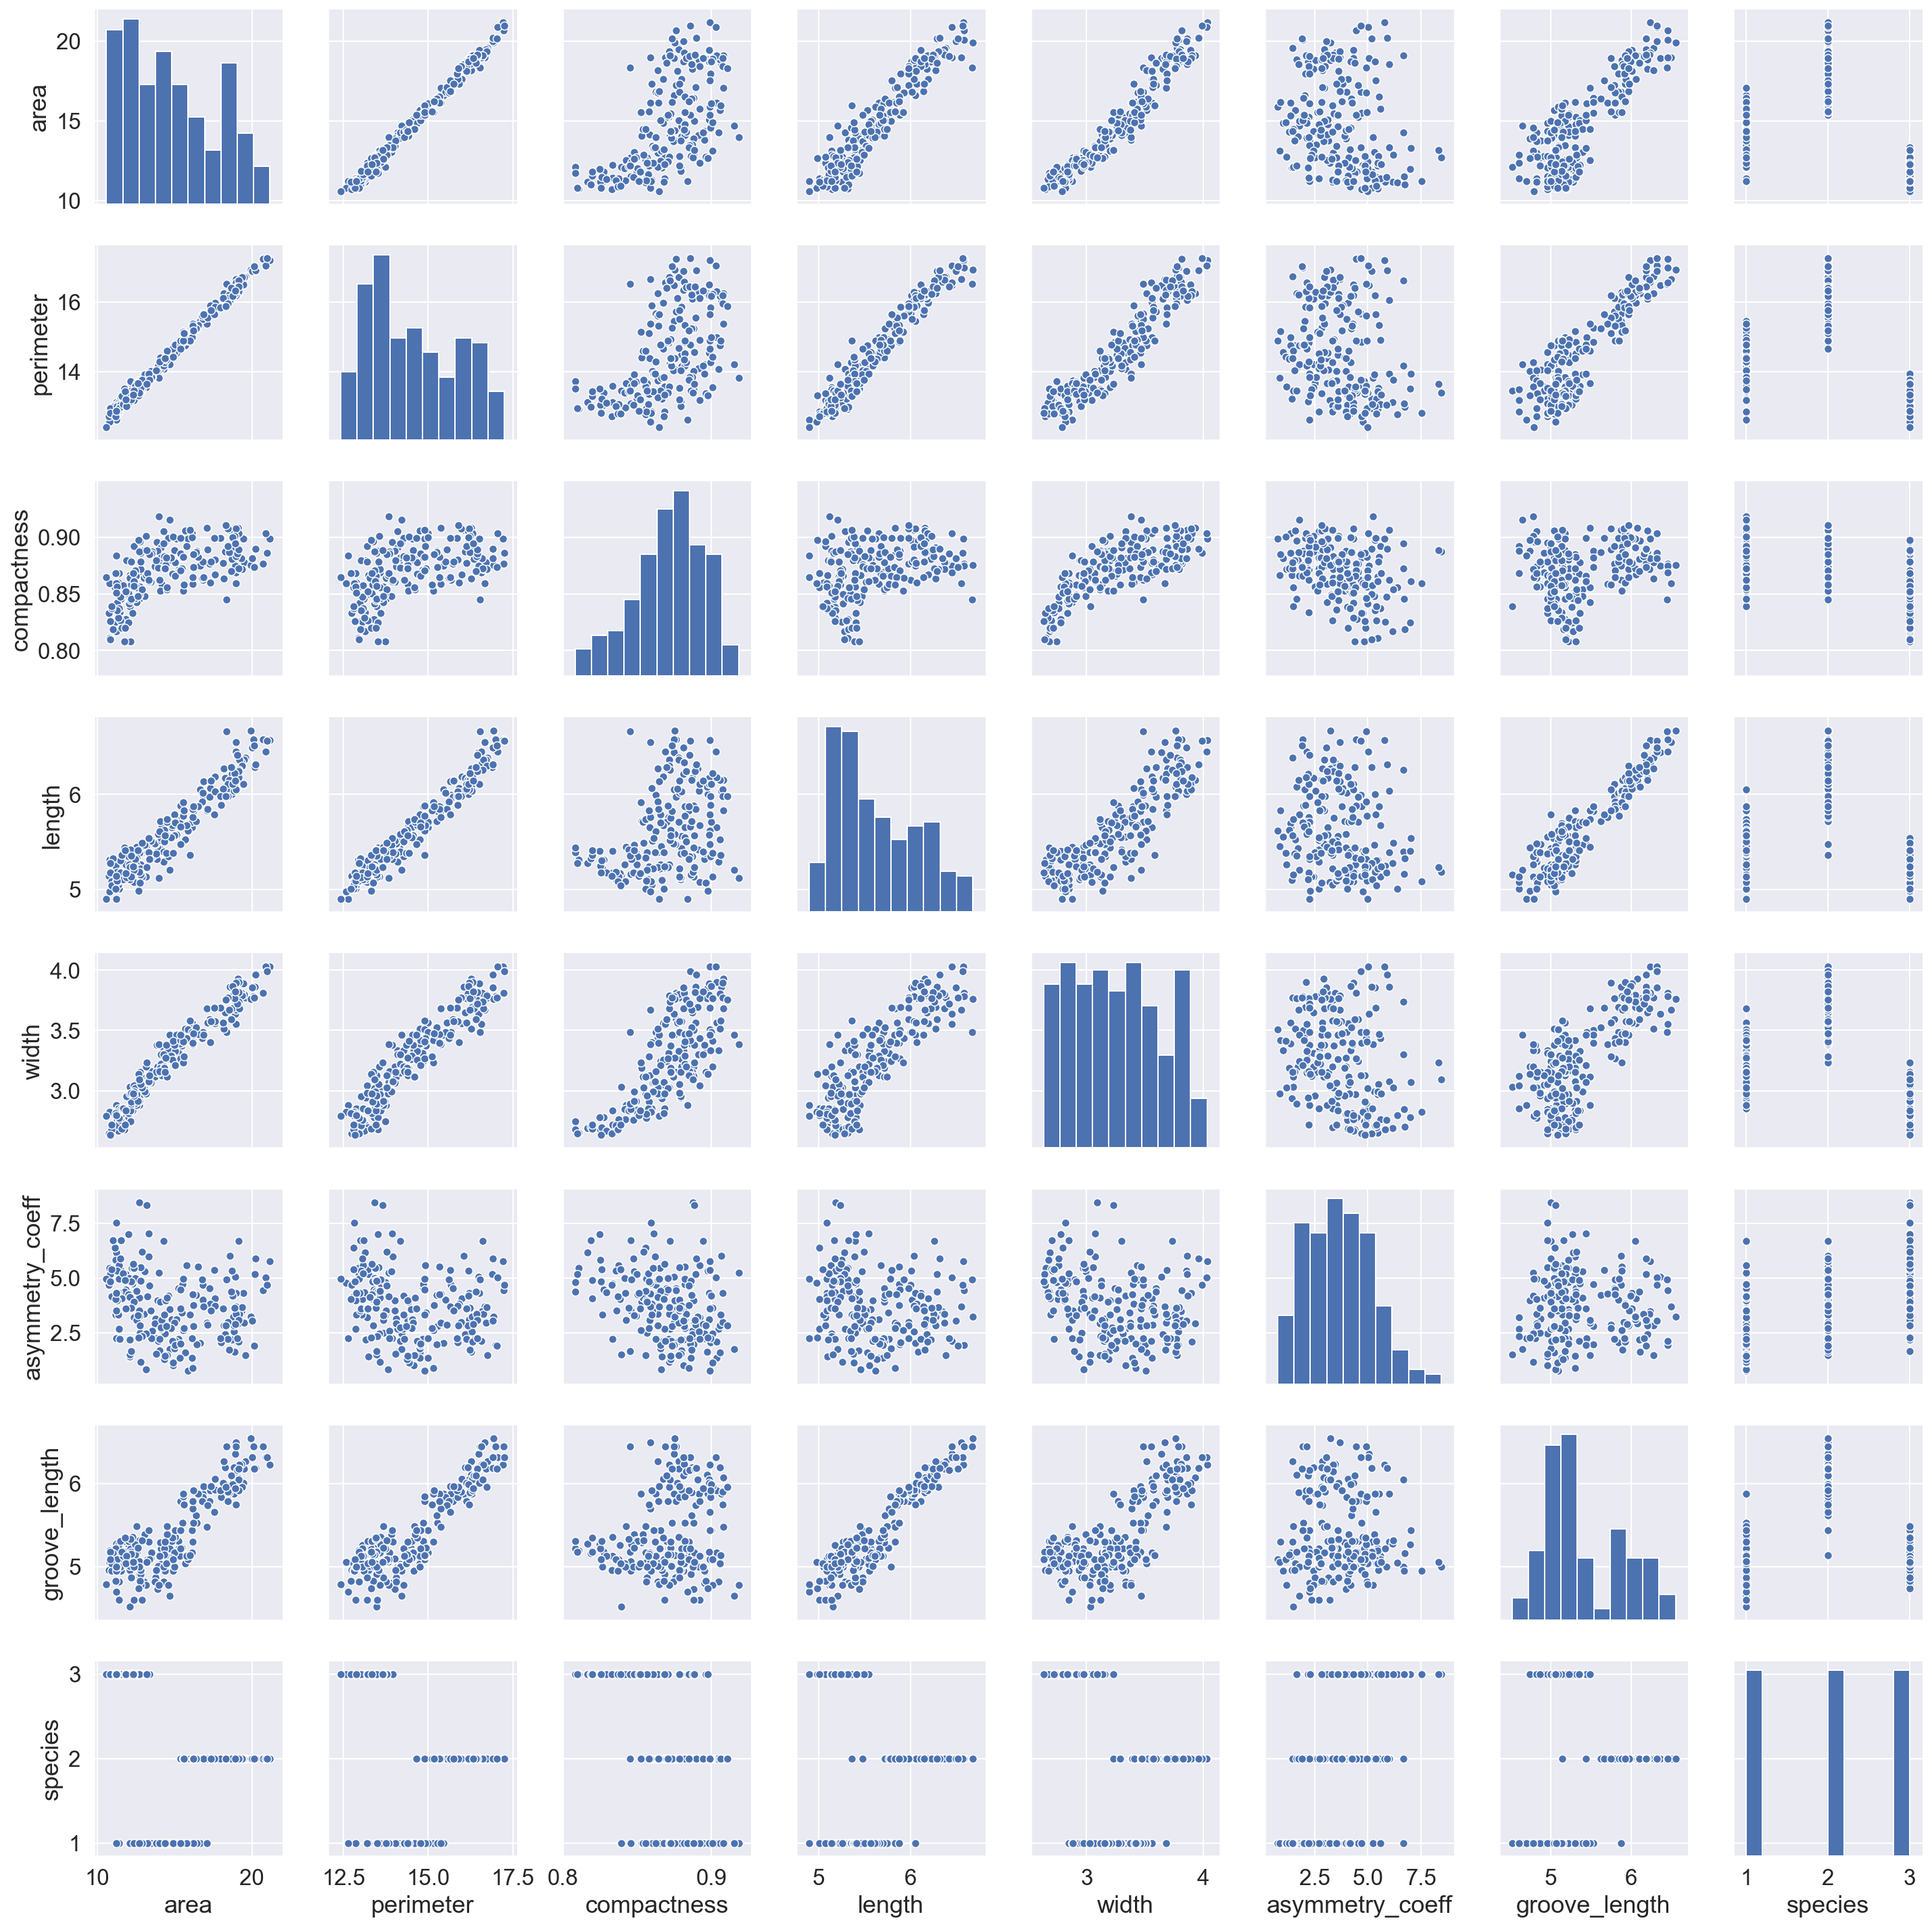

In [5]:
sns.pairplot(seeds)
plt.show()

Can our naked eye see any clusters within these scatter plots?

- *groove_length vs. compactness looks like 2 clusters*  
- *perimeter vs. groove_length maybe 3 clusters*

In [6]:
# Check for nulls
seeds.isnull().sum()
# there is a value for every position in the DF

area               0
perimeter          0
compactness        0
length             0
width              0
asymmetry_coeff    0
groove_length      0
species            0
dtype: int64

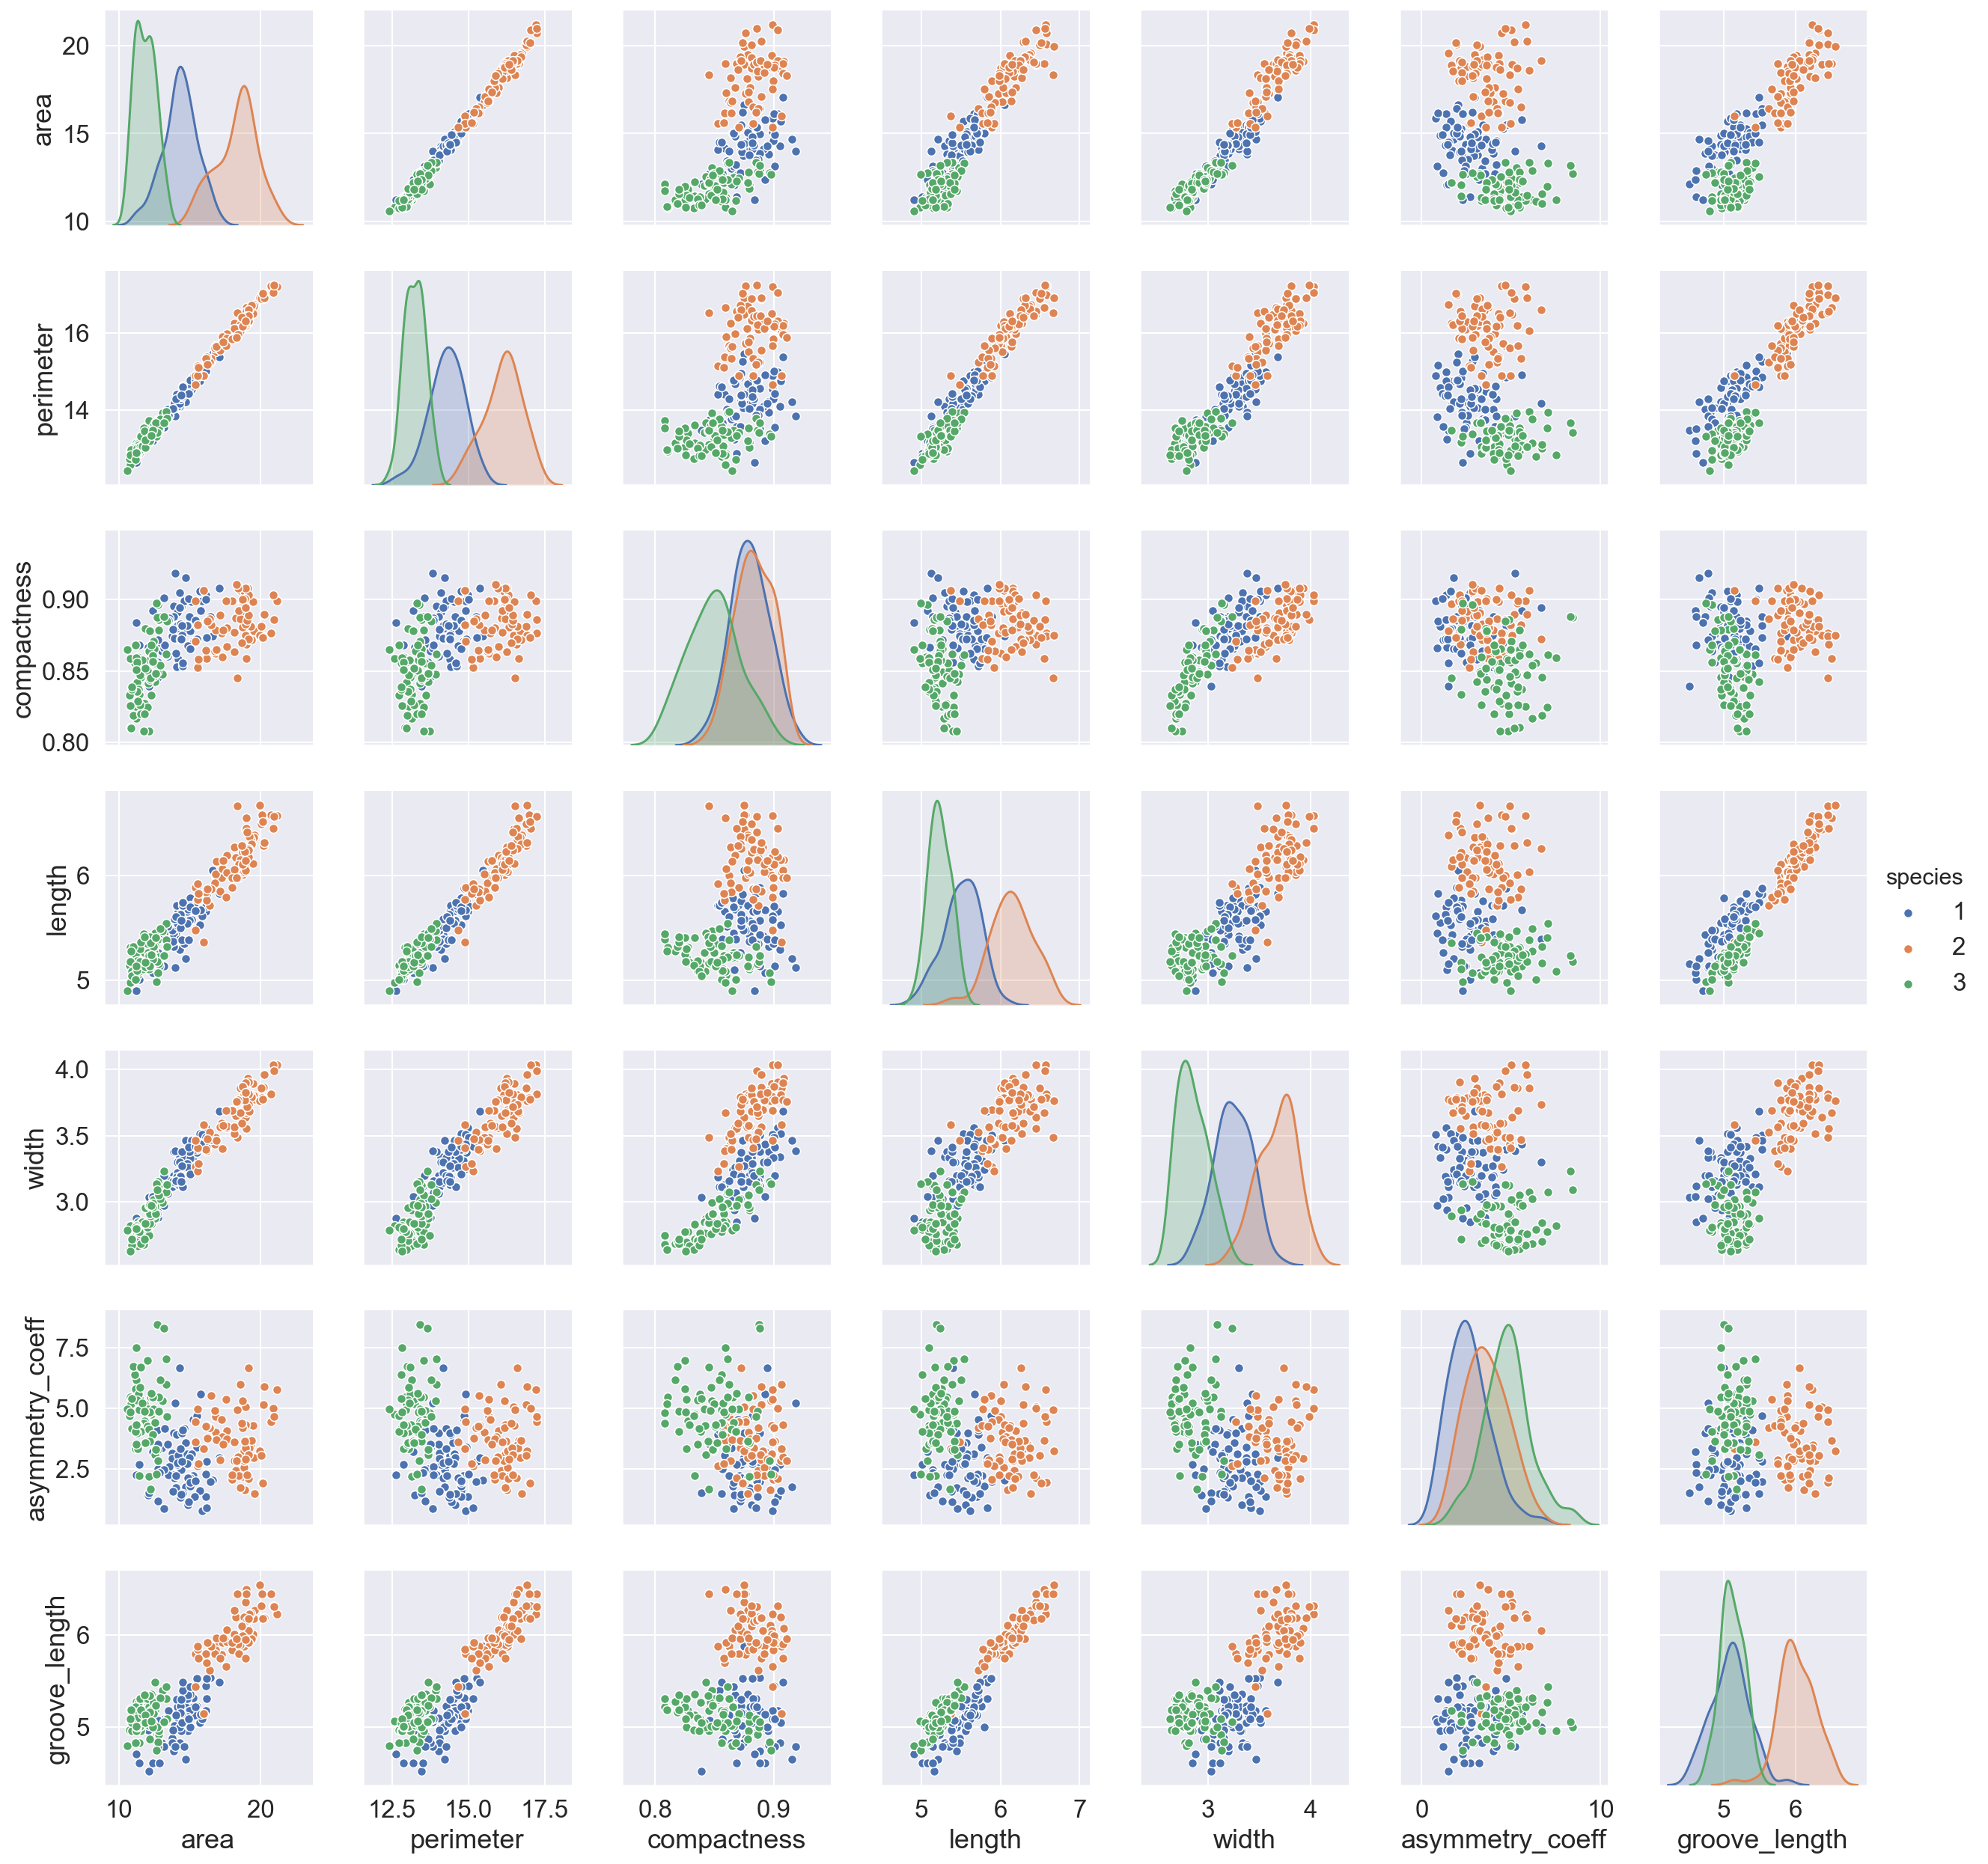

In [7]:
# Look at the real species labels.
sns.pairplot(vars=[col for col in seeds if col!='species'], 
             data=seeds, hue='species')
plt.show()
# classes appear to have a similar number of samples.
# Blue consistently looks like the divisor between the green and red classes.

In this situation we can see that the `perimeter` vs. `groove_length` is a good visualization to view the proper classes, and we can use the latter to compare the results of clustering to a true value.

In [8]:
seeds.species.value_counts()
# all classes are equally distributed. 

3    70
2    70
1    70
Name: species, dtype: int64

In [9]:
# Check datatypes
seeds.dtypes

area               float64
perimeter          float64
compactness        float64
length             float64
width              float64
asymmetry_coeff    float64
groove_length      float64
species              int64
dtype: object

### Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [10]:
# drop 'species', which is currently acting as a target (categorical)
X = seeds.drop('species', axis=1)
y = seeds.species

### Rescale the data if necessary

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
Xstd = scaler.fit_transform(X)

### Clustering with K-Means

- We know that there are 3 actual classes. 
- Use the elbow plot to judge if 3 clusters are a good fit.

In [13]:
from sklearn.cluster import KMeans

# 2 Clusters
k_mean = KMeans(n_clusters=3)
labels = k_mean.fit_predict(Xstd)

In [14]:
from scikitplot.cluster import plot_elbow_curve

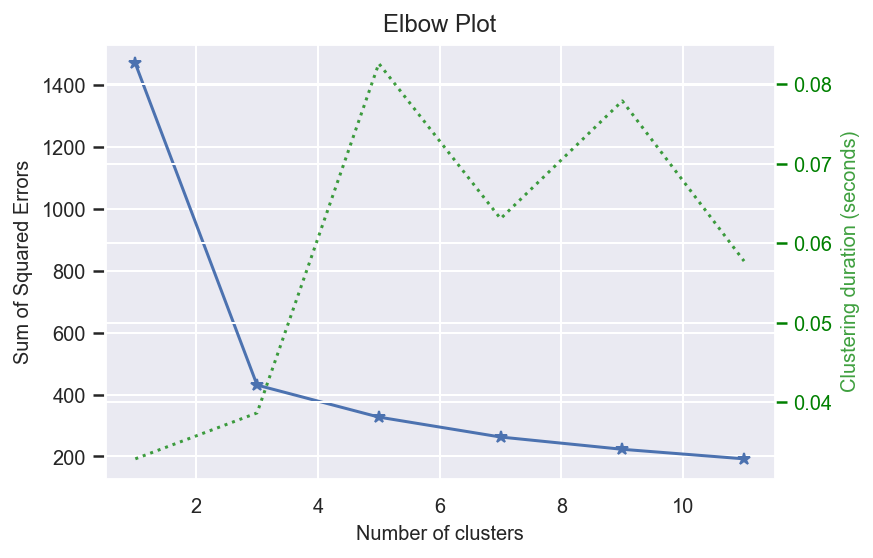

In [15]:
plot_elbow_curve(k_mean, Xstd)
plt.show()

### Get the labels and centroids for out first clustering model

In [16]:
# Labels and centroids for 8 Clusters
labels = k_mean.labels_
print(labels)

[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 1 1 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0]


In [17]:
centroids = k_mean.cluster_centers_
print(centroids)

[[-1.03025257 -1.00664879 -0.9649051  -0.89768501 -1.08558344  0.69480448
  -0.62480856]
 [-0.14111949 -0.17004259  0.4496064  -0.25781445  0.00164694 -0.66191867
  -0.58589311]
 [ 1.25668163  1.26196622  0.56046437  1.23788278  1.16485187 -0.04521936
   1.29230787]]


### Compute the silhouette score and visually examine the results of the clusters

_(pairplot with hue)_

In [18]:
from sklearn.metrics import silhouette_score

silhouette_score(Xstd, labels)

0.4007270552751299

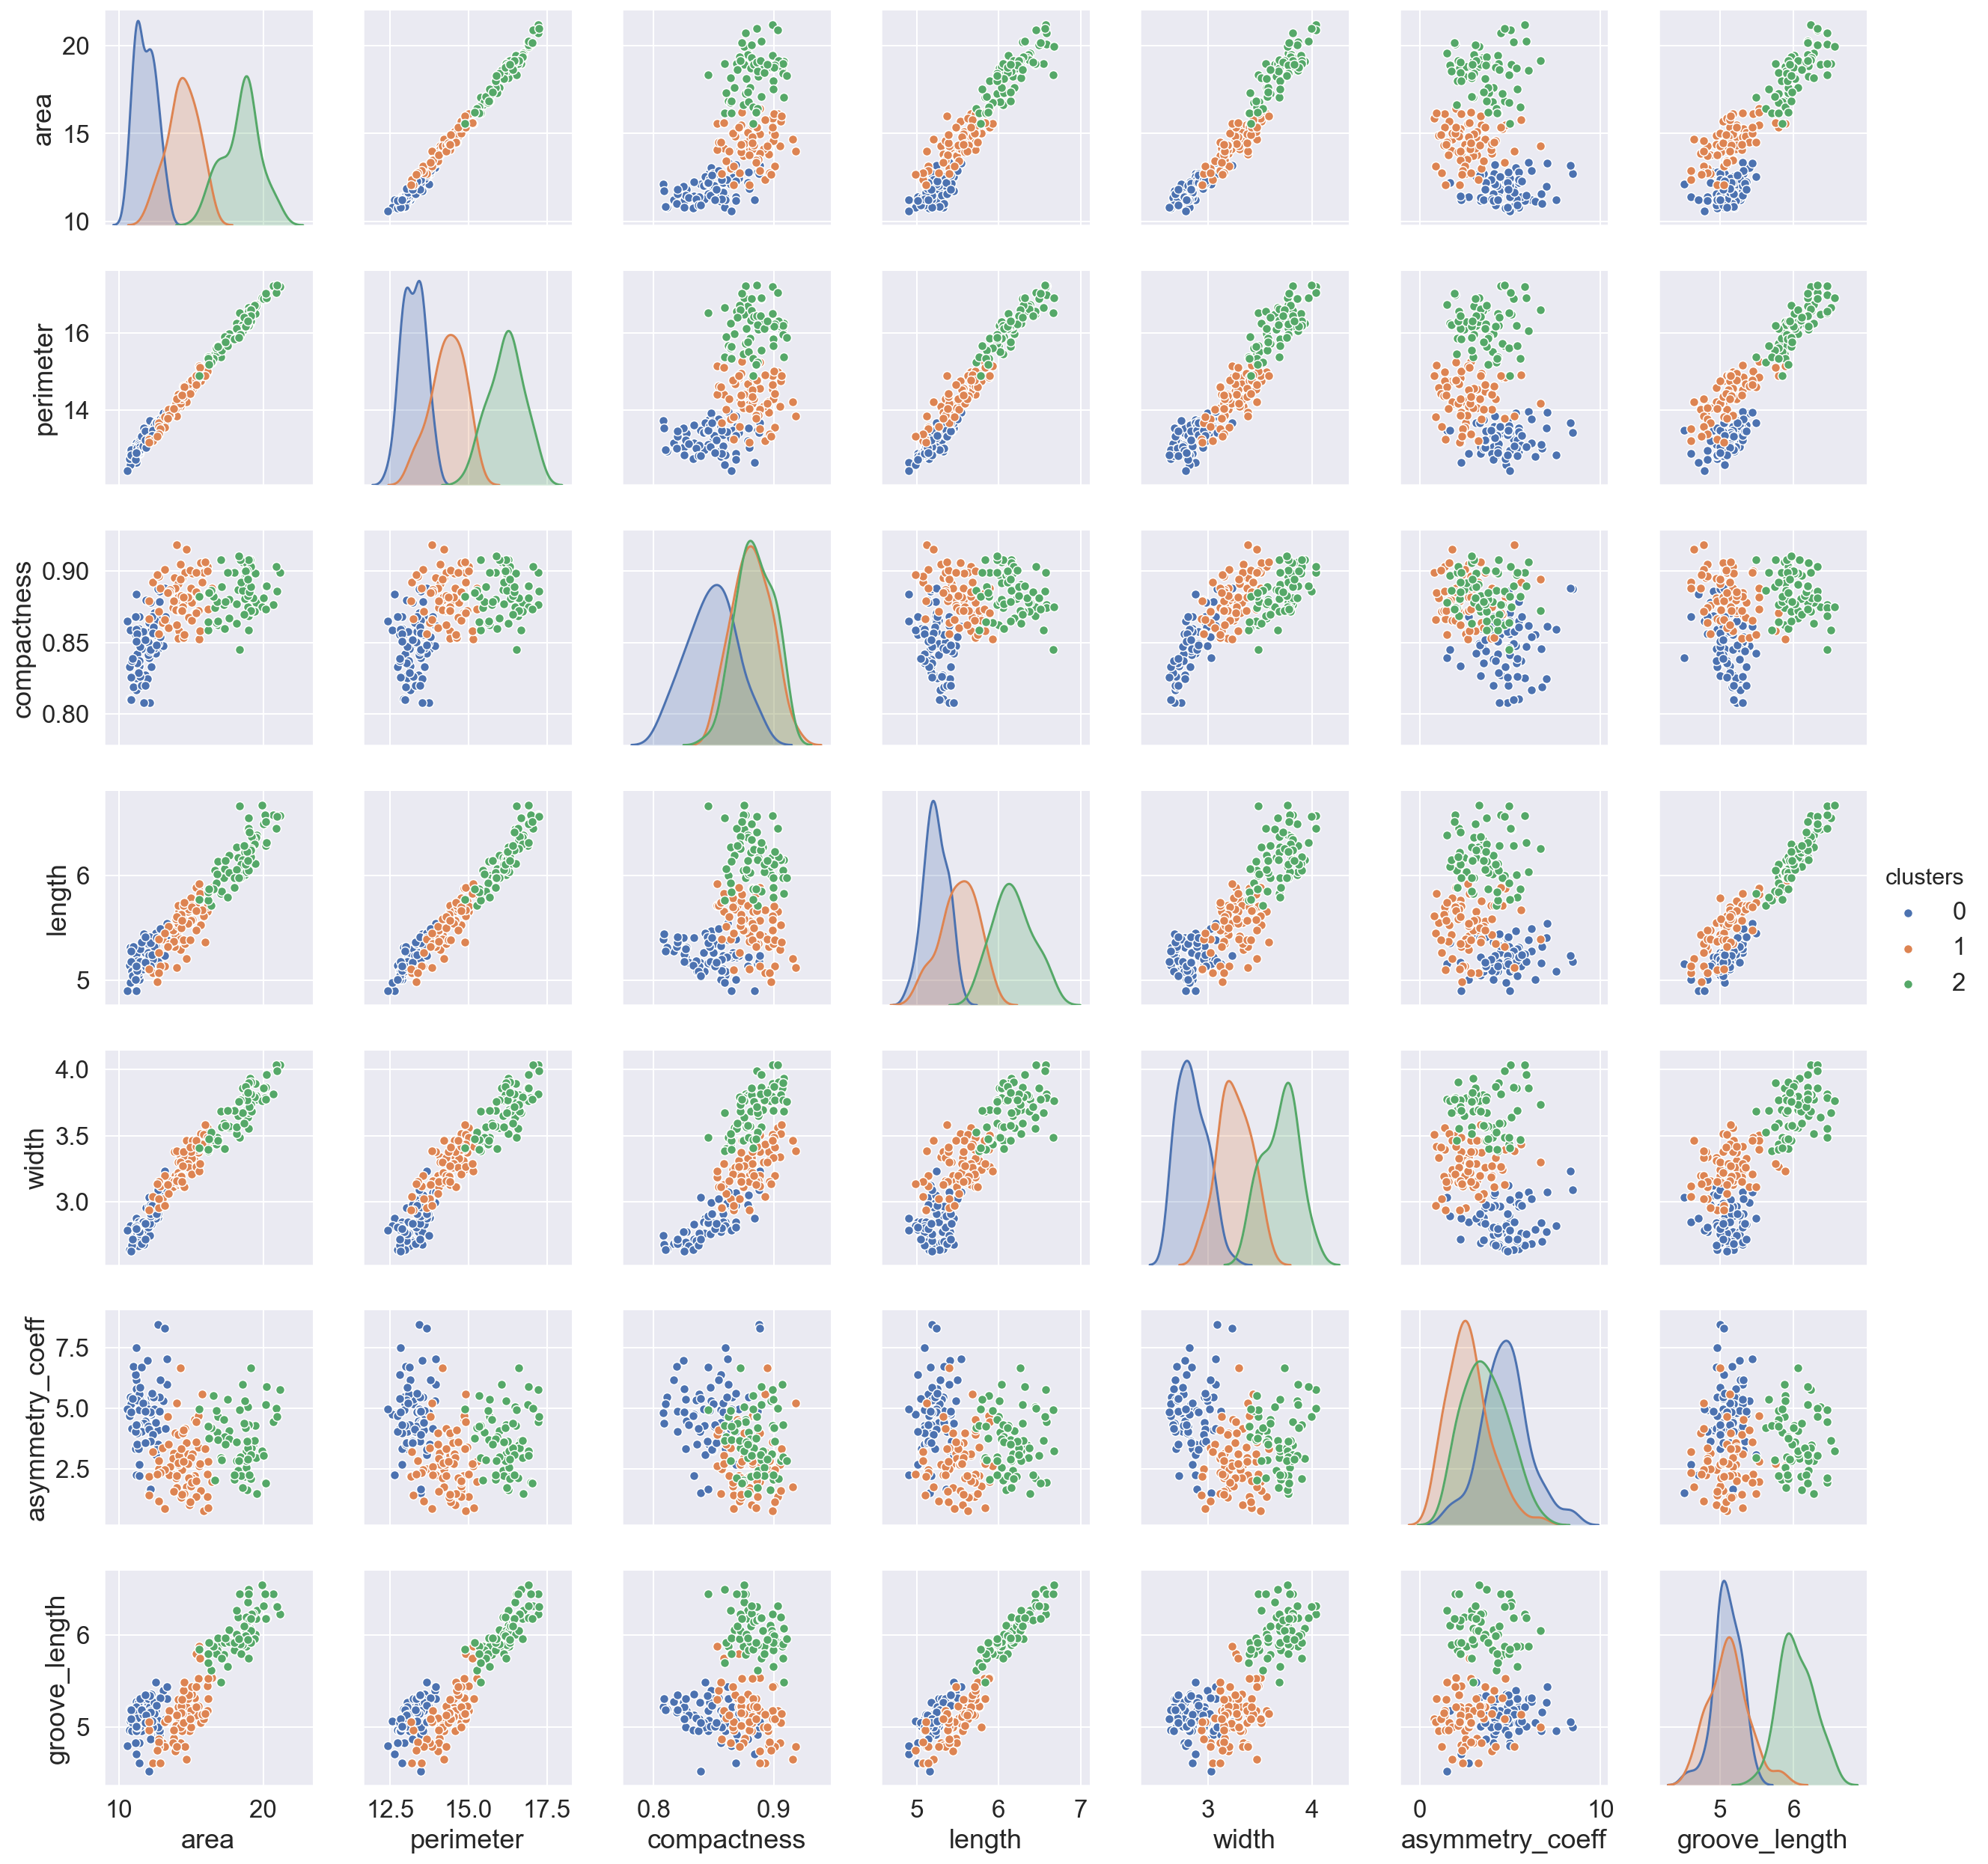

In [19]:
# visually examine the clusters that have been created

X['clusters'] = labels
sns.pairplot(vars=[col for col in seeds if col!='species'], data=X, hue='clusters')
plt.show()

### Repeat the last steps with two selected K values and compare the results

In [20]:
# 4 Clusters
k_mean4 = KMeans(n_clusters=4)
k_mean4.fit(Xstd)
labels_4 = k_mean4.labels_
silhouette_score(Xstd, labels_4)

0.3369008229710853

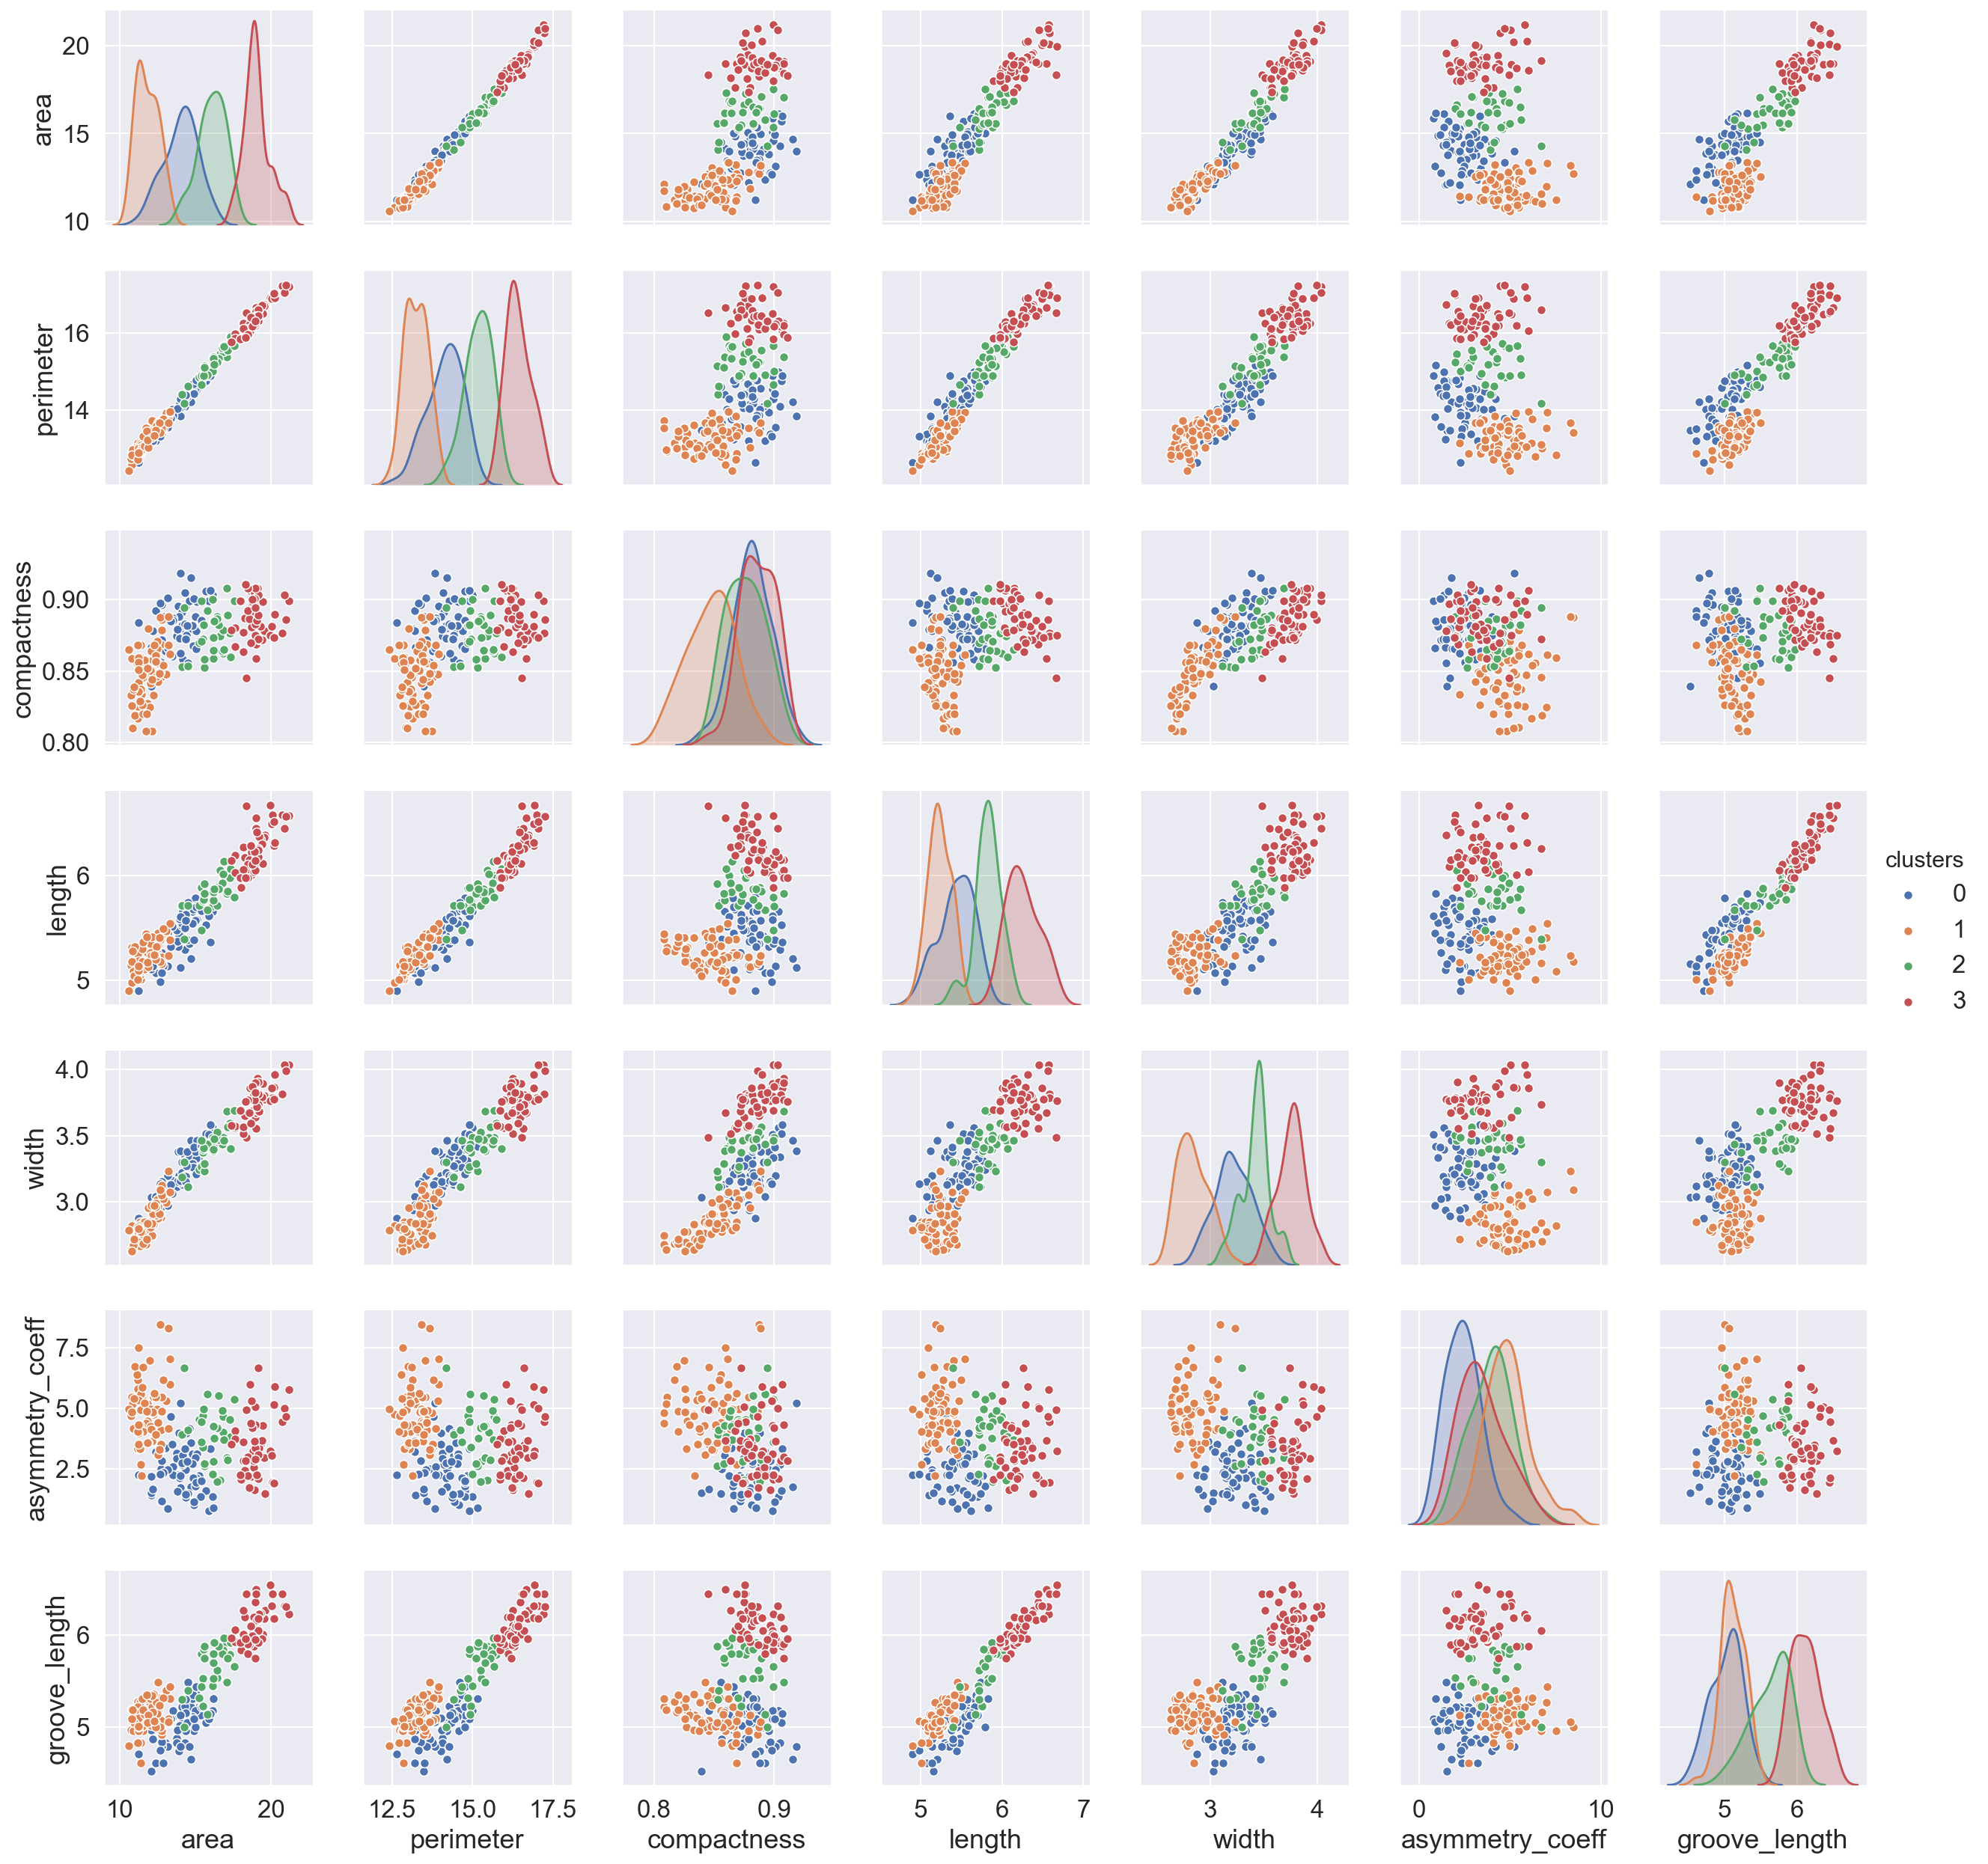

In [21]:
X_4 = seeds.drop('species', axis=1)
X_4['clusters'] = labels_4

sns.pairplot(vars=[col for col in seeds if col!='species'], data=X_4, hue='clusters')
plt.show()

In [22]:
# 6 Clusters
k_mean6 = KMeans(n_clusters=6)
k_mean6.fit(Xstd)
labels_6 = k_mean6.labels_
silhouette_score(Xstd, labels_6)

0.28493522241365093

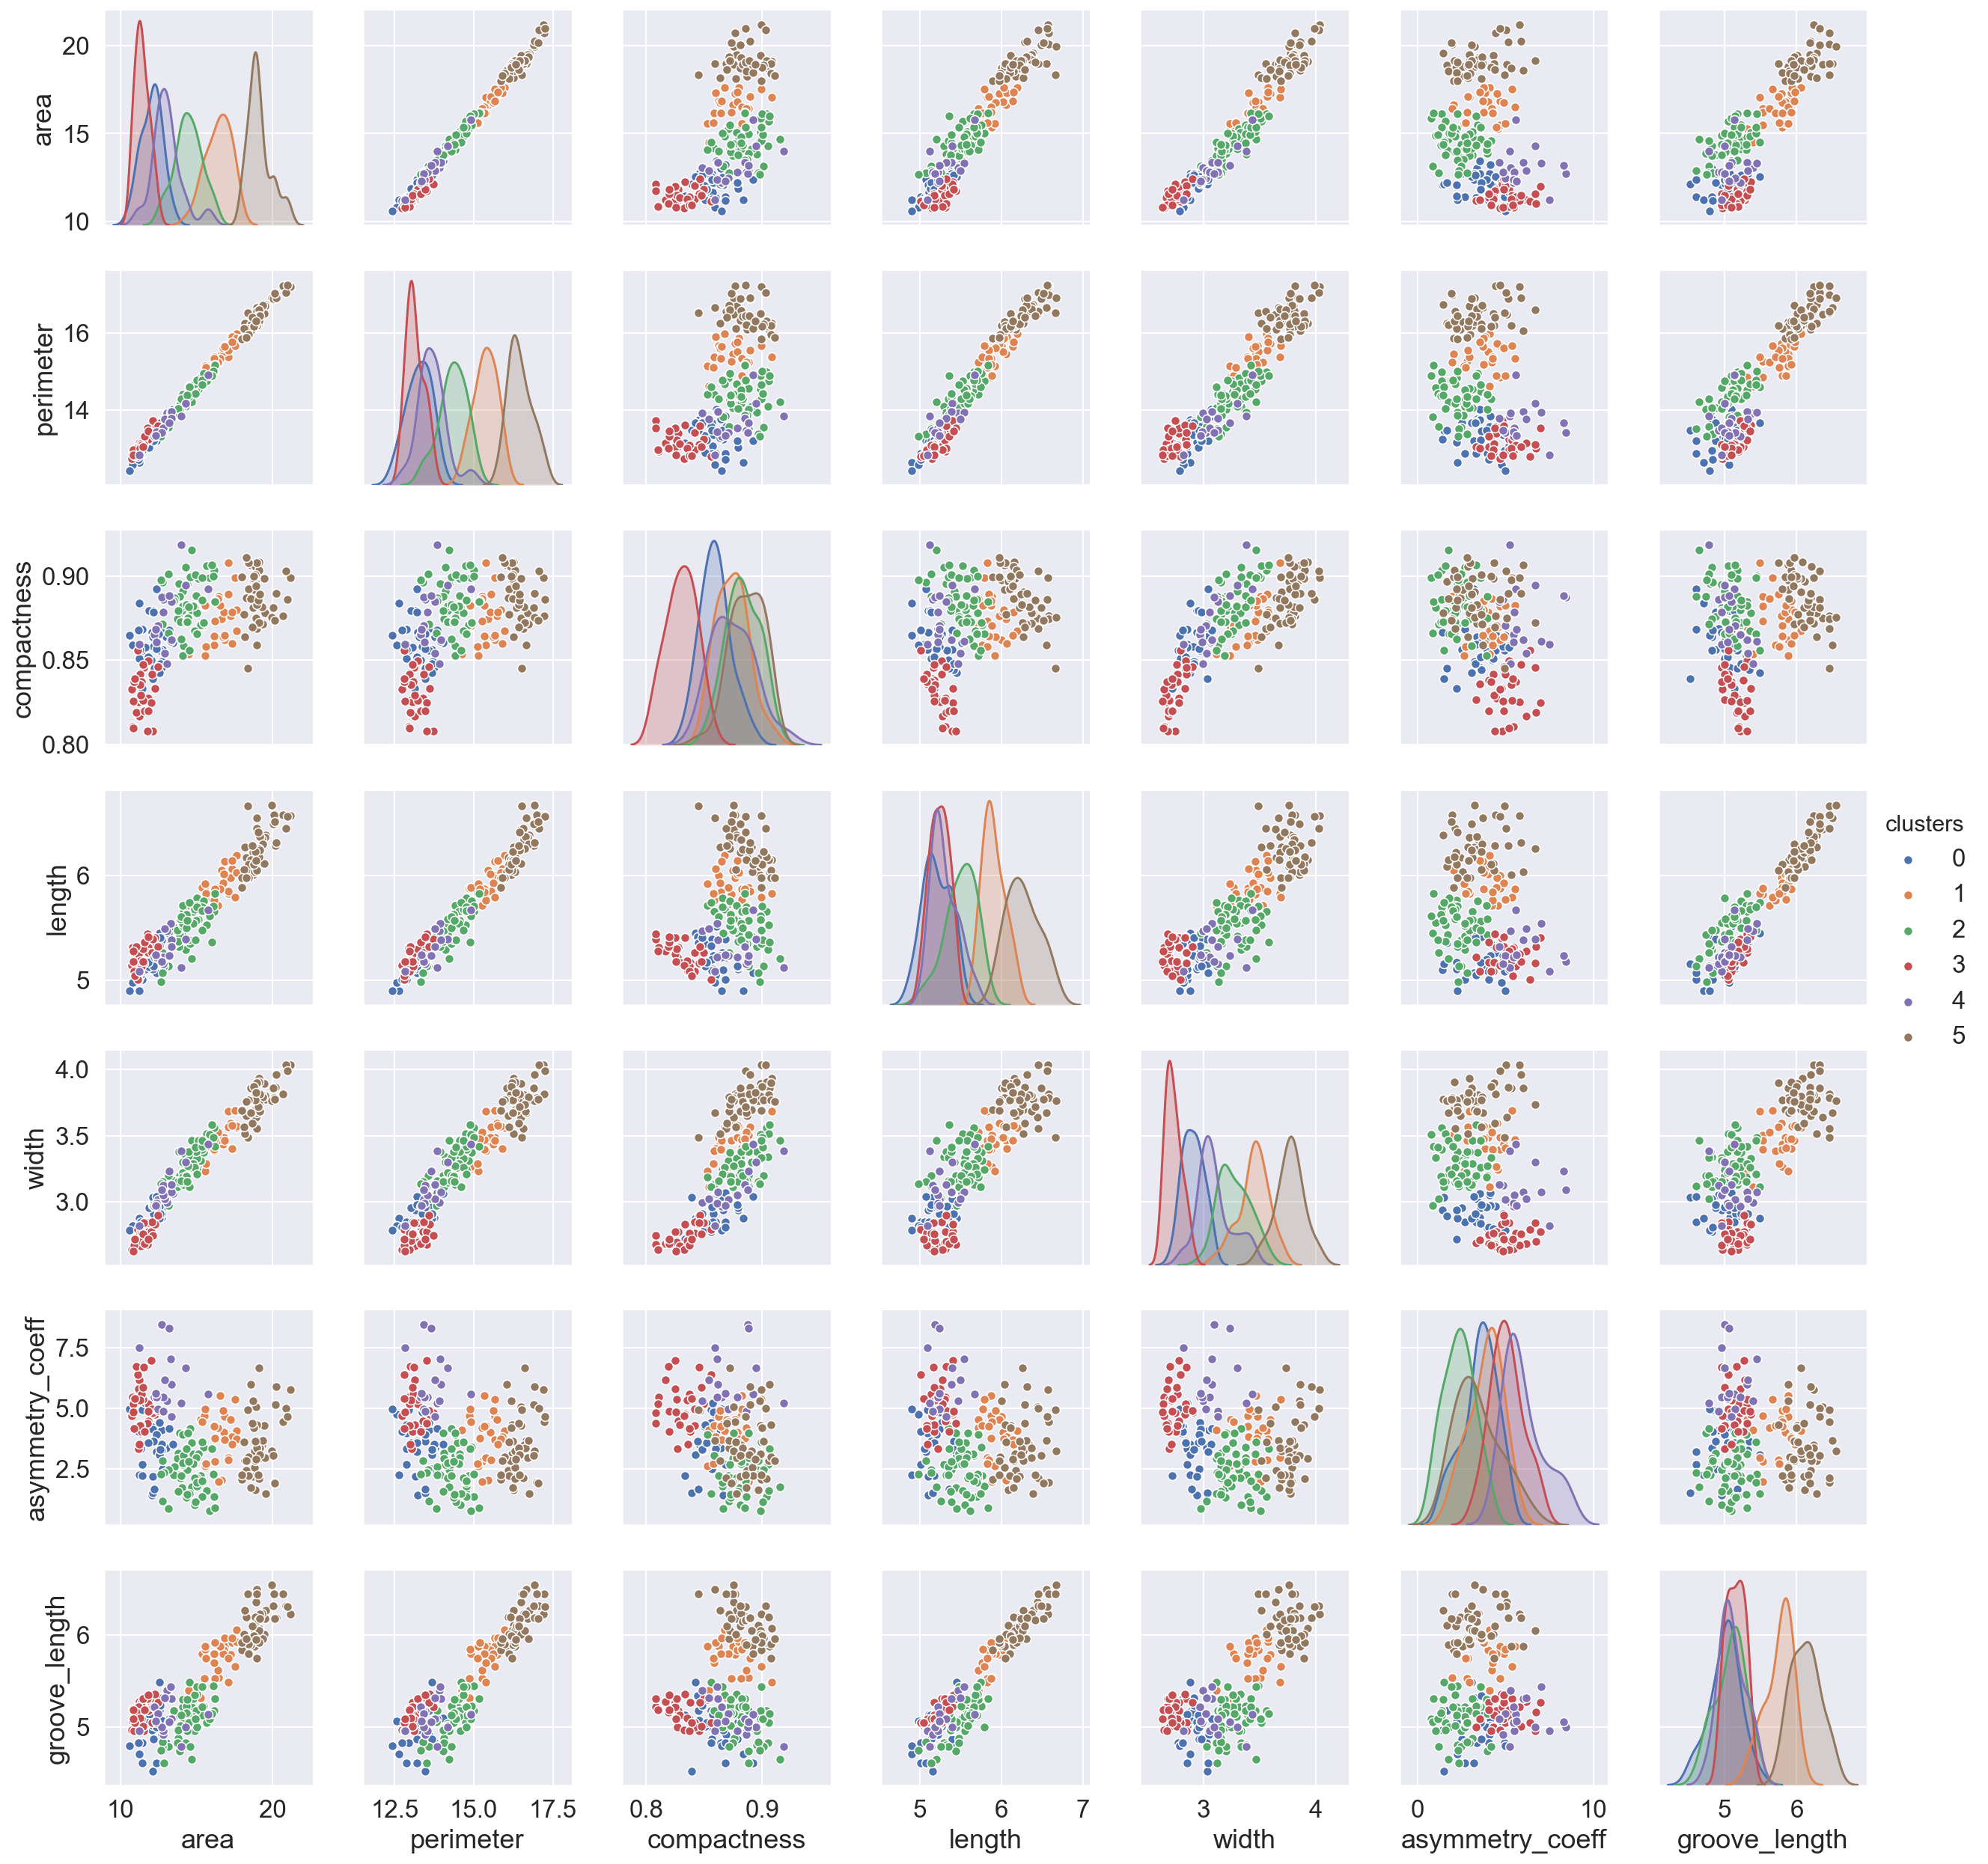

In [23]:
X_6 = seeds.drop('species', axis=1)
X_6['clusters'] = labels_6

sns.pairplot(vars=[col for col in seeds if col!='species'], data=X_6, hue='clusters')
plt.show()

### Build a function to find the optimal number of clusters using silhouette score as the criterion.
1. The function should accept a range and a dataframe as arguments
2. It should return the k value, associated silhoutte score and scaling method.
3. Your function should also consider different scaling options like `StandardScaler`, `MinMaxScaler`.

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [25]:
X = seeds
y = seeds.pop('species')

In [26]:
def fitter(X, y, model=KMeans(), scaler=StandardScaler(), k_values=range(2,11)):
    pipe = make_pipeline(scaler, model)
    for k in k_values:
        model.set_params(n_clusters=k)
        pipe.fit(X)
        labels = pipe.steps[1][1].labels_
        print(k, round(silhouette_score(pipe.steps[0][1].fit_transform(X), labels), 3), 
             np.around(homogeneity_completeness_v_measure(y, labels), 3))

In [27]:
fitter(X, y)

2 0.466 [0.442 0.74  0.554]
3 0.401 [0.728 0.728 0.728]
4 0.328 [0.75  0.613 0.675]
5 0.285 [0.719 0.5   0.59 ]
6 0.274 [0.76  0.475 0.585]
7 0.261 [0.778 0.446 0.567]
8 0.26 [0.768 0.419 0.542]
9 0.256 [0.759 0.387 0.513]
10 0.248 [0.776 0.377 0.507]


In [28]:
fitter(X, y, scaler=MinMaxScaler())

2 0.505 [0.442 0.74  0.554]
3 0.422 [0.673 0.675 0.674]
4 0.338 [0.741 0.592 0.658]
5 0.292 [0.783 0.542 0.641]
6 0.291 [0.796 0.504 0.617]
7 0.288 [0.779 0.455 0.574]
8 0.261 [0.798 0.425 0.554]
9 0.261 [0.808 0.41  0.544]
10 0.259 [0.814 0.395 0.532]
